In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-09d411fc-a5c3-71cd-45b2-2e992a541956)


In [ ]:
import pandas as pd

In [ ]:
# Input Dataset
df = pd.read_csv("/content/tech2.csv", encoding='latin-1')#raw tech data

In [ ]:
df=pd.read_csv("/content/userrev(scrapped).csv", encoding='latin-1')#raw user data

In [ ]:
df=pd.read_csv("/content/userrev(scrapped).csv", encoding='latin-1')#raw user data

In [ ]:
df['text'] = df['review_title'].astype(str) + ' ' + df['review_content'].astype(str)

In [ ]:
df

,product_id,product_url,product_name,review_title,review_content,review_date,Unnamed: 6,Unnamed: 7,text
0,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,SpeedTest,NaN,works perfectly fine for school and work,15 days ago.,NaN,NaN,nan works perfectly fine for school and work
1,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,SpeedTest,Poor,Keeps spiking to 100% and giving major perform...,7 months ago.,NaN,NaN,Poor Keeps spiking to 100% and giving major pe...
2,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,SpeedTest,Excellent,"great processor for basic functions, meets eve...",4 months ago.,NaN,NaN,"Excellent great processor for basic functions,..."
3,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,SpeedTest,Average,"2C 4T mobile CPU. Base clock of 1.7Ghz, turbo ...",3 years ago.,NaN,NaN,Average 2C 4T mobile CPU. Base clock of 1.7Ghz...
4,11th-Gen-IntelR-CoreTM-i5-1130G7---110GHz,https://cpu.userbenchmark.com/SpeedTest/141823...,SpeedTest,NaN,NaN,23 months ago.,NaN,NaN,nan nan
...,...,...,...,...,...,...,...,...,...
5193,PentiumR-Dual-Core-CPU-------T4300----210GHz,https://cpu.userbenchmark.com/SpeedTest/2938/P...,SpeedTest,NaN,NaN,5 months ago.,NaN,NaN,nan nan
5194,PentiumR-Dual-Core-CPU-------T4300----210GHz,https://cpu.userbenchmark.com/SpeedTest/2938/P...,SpeedTest,Good,My first notebook Acer Gateway NV44 have this ...,4 years ago.,NaN,NaN,Good My first notebook Acer Gateway NV44 have ...
5195,PentiumR-Dual-Core-CPU-------T4400----220GHz,https://cpu.userbenchmark.com/SpeedTest/1886/P...,SpeedTest,NaN,NaN,23 months ago.,NaN,NaN,nan nan
5196,PentiumR-Dual-Core-CPU-------T4500----230GHz,https://cpu.userbenchmark.com/SpeedTest/2148/P...,SpeedTest,NaN,NaN,2 years ago.,NaN,NaN,nan nan


In [ ]:
#unique rating of user data
df['review_rating'].unique()

array([4, 5, 1, 3])

In [ ]:
# find null values in df and delete

df.isnull().sum()
df = df.dropna()


In [ ]:
#print index of df ['review rating'] where value is ' '

import pandas as pd

# Get the index of rows where 'review_rating' is empty
empty_review_rating_indices = df[df['review_rating'] == ' '].index

# Print the indices
print(empty_review_rating_indices)


Index([], dtype='int64')


In [ ]:
# prompt: print unique values of df['review rating']

print(df['review_rating'].unique())


[4 5 1 3]


In [ ]:
# replace review_rating in df to positive if valueis 5 and 4

df['review_rating'] = df['review_rating'].replace(5, 'positive')
df['review_rating'] = df['review_rating'].replace(4, 'positive')
df['review_rating'] = df['review_rating'].replace(1, 'negative')

In [ ]:
# handling review with rating 3

#df[df['review_rating'] == 3]
for index,line in df.iterrows():

   if line['review_rating']:
    if line['review_likes']>line['review_dislikes']:
      df['review_rating'] = df['review_rating'].replace(3, 'positive')
    elif line['review_likes']<line['review_dislikes']:
      df['review_rating'] = df['review_rating'].replace(3, 'negative')
    else:
      df['review_rating'] = df['review_rating'].replace(3, 'positive')

In [ ]:
df

,product_id,product_fullName,product_url,product_name,product_cost,review_title,review_content,review_rating,review_date,review_location,review_likes,review_dislikes,text
0,itmfa5j4jcma4px6,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Intel I7,"6,999",Delightful,Seems to be performing as expected. Loved it.,4,"Aug, 2022",Haileymandi,19,1,Delightful Seems to be performing as expected....
1,itmfa5j4jcma4px6,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Intel I7,"6,999",Fabulous!,"Okay so, at first i was worried as hell, if it...",positive,"Sep, 2022",Uttarpara Kotrung,23,4,"Fabulous! Okay so, at first i was worried as h..."
2,itmfa5j4jcma4px6,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Intel I7,"6,999",Terrific,Pacaging was not good and obviously its used p...,positive,"Oct, 2022",Tanda Ambedkar Nagar District,8,1,Terrific Pacaging was not good and obviously i...
3,itmfa5j4jcma4px6,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Intel I7,"6,999",Terrific purchase,"Processor is very good, its like new processor...",positive,"Aug, 2022",Veraval Rajkot District,15,5,"Terrific purchase Processor is very good, its ..."
4,itmfa5j4jcma4px6,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Intel I7,"6,999",Brilliant,Good mast candishen power full processor thank...,positive,"May, 2023",Sandur,3,0,Brilliant Good mast candishen power full proce...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,itm0ffcf9089ca76,intel-i3-12100f-4-3-ghz-upto-lga1700-socket-4-...,https://www.flipkart.com/intel-i3-12100f-4-3-g...,Intel i3-12100F,"10,950",Perfect product!,Good ???,positive,"Feb, 2023",Haridwar,0,0,Perfect product! Good ???
1176,itm0ffcf9089ca76,intel-i3-12100f-4-3-ghz-upto-lga1700-socket-4-...,https://www.flipkart.com/intel-i3-12100f-4-3-g...,Intel i3-12100F,"10,950",Excellent,Supb. Product,positive,"Jan, 2023",Visakhapatnam,0,0,Excellent Supb. Product
1177,itm3a4e911ab1b55,intel-i9-13900kf-2-2-ghz-lga1700-socket-8-core...,https://www.flipkart.com/intel-i9-13900kf-2-2-...,Intel i9-13900KF,"91,000",Excellent,Get performance for machine learning and Graph...,positive,11 months ago,Surat,0,0,Excellent Get performance for machine learning...
1178,itm1c0df8b3313fa,intel-core-i7-2600-2nd-gen-quad-core-8mb-cache...,https://www.flipkart.com/intel-core-i7-2600-2n...,Intel Core,"6,500",Useless product,"Not working and waste of money, because no ret...",1,"Apr, 2023",Nuzvid,14,3,Useless product Not working and waste of money...


In [ ]:
df

,product_id,product_fullName,product_url,product_name,product_cost,review_title,review_content,review_rating,review_date,review_location,review_likes,review_dislikes,text
0,itmfa5j4jcma4px6,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Intel I7,"6,999",Delightful,Seems to be performing as expected. Loved it.,4,"Aug, 2022",Haileymandi,19,1,Delightful Seems to be performing as expected....
1,itmfa5j4jcma4px6,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Intel I7,"6,999",Fabulous!,"Okay so, at first i was worried as hell, if it...",positive,"Sep, 2022",Uttarpara Kotrung,23,4,"Fabulous! Okay so, at first i was worried as h..."
2,itmfa5j4jcma4px6,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Intel I7,"6,999",Terrific,Pacaging was not good and obviously its used p...,positive,"Oct, 2022",Tanda Ambedkar Nagar District,8,1,Terrific Pacaging was not good and obviously i...
3,itmfa5j4jcma4px6,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Intel I7,"6,999",Terrific purchase,"Processor is very good, its like new processor...",positive,"Aug, 2022",Veraval Rajkot District,15,5,"Terrific purchase Processor is very good, its ..."
4,itmfa5j4jcma4px6,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Intel I7,"6,999",Brilliant,Good mast candishen power full processor thank...,positive,"May, 2023",Sandur,3,0,Brilliant Good mast candishen power full proce...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,itm0ffcf9089ca76,intel-i3-12100f-4-3-ghz-upto-lga1700-socket-4-...,https://www.flipkart.com/intel-i3-12100f-4-3-g...,Intel i3-12100F,"10,950",Perfect product!,Good ???,positive,"Feb, 2023",Haridwar,0,0,Perfect product! Good ???
1176,itm0ffcf9089ca76,intel-i3-12100f-4-3-ghz-upto-lga1700-socket-4-...,https://www.flipkart.com/intel-i3-12100f-4-3-g...,Intel i3-12100F,"10,950",Excellent,Supb. Product,positive,"Jan, 2023",Visakhapatnam,0,0,Excellent Supb. Product
1177,itm3a4e911ab1b55,intel-i9-13900kf-2-2-ghz-lga1700-socket-8-core...,https://www.flipkart.com/intel-i9-13900kf-2-2-...,Intel i9-13900KF,"91,000",Excellent,Get performance for machine learning and Graph...,positive,11 months ago,Surat,0,0,Excellent Get performance for machine learning...
1178,itm1c0df8b3313fa,intel-core-i7-2600-2nd-gen-quad-core-8mb-cache...,https://www.flipkart.com/intel-core-i7-2600-2n...,Intel Core,"6,500",Useless product,"Not working and waste of money, because no ret...",1,"Apr, 2023",Nuzvid,14,3,Useless product Not working and waste of money...


In [ ]:
df['review_rating'].value_counts()

review_rating
positive    1091
negative      89
Name: count, dtype: int64

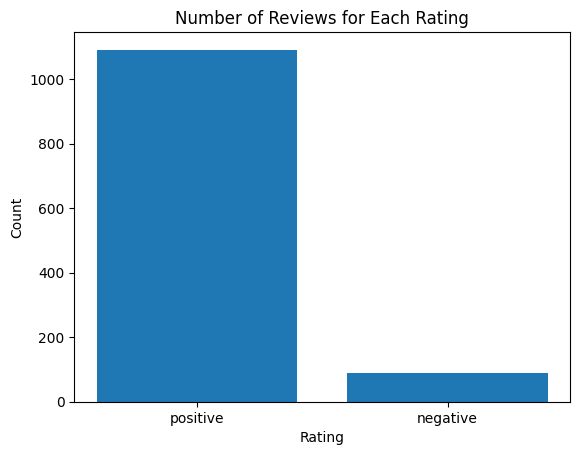

In [ ]:
# prompt: plot a graph based on unique values of rating

import matplotlib.pyplot as plt

# Get the number of occurrences for each unique rating
rating_counts = df['review_rating'].value_counts()

# Create a bar chart
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Number of Reviews for Each Rating")
plt.show()


In [ ]:
df['review_dislikes'].value_counts()

review_dislikes
0.0     843
1.0     149
2.0      60
3.0      29
4.0      21
5.0      17
7.0      10
12.0     10
11.0      8
6.0       8
10.0      7
9.0       6
8.0       5
14.0      4
24.0      2
15.0      2
13.0      2
52.0      1
27.0      1
20.0      1
47.0      1
25.0      1
28.0      1
42.0      1
30.0      1
19.0      1
35.0      1
21.0      1
16.0      1
23.0      1
Name: count, dtype: int64

In [ ]:
df['review_likes'].value_counts()

review_likes
0      671
1      152
2      100
3       44
6       24
4       24
8       16
7       15
5       14
9       12
23      10
11      10
16       8
18       7
14       7
15       6
34       6
10       5
12       5
19       4
13       4
21       4
72       4
28       4
30       3
25       2
39       2
33       2
37       2
50       2
62       2
94       2
27       2
35       2
20       2
38       2
49       2
42       1
98       1
36       1
82       1
22       1
84       1
79       1
17       1
43       1
32       1
88       1
115      1
26       1
107      1
55       1
Name: count, dtype: int64

In [ ]:
df['review_rating'][24]

' '

In [ ]:
df.isnull().sum()

product_id          0
product_fullName    0
product_url         0
product_name        0
product_cost        0
review_title        1
review_content      0
review_rating       0
review_date         0
review_location     0
review_likes        0
review_dislikes     2
text                0
dtype: int64

In [ ]:
df1.isnull().sum()

0         0
text      0
rating    0
dtype: int64

#Data Cleaning

In [ ]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re

In [ ]:

def clean_text(text):

  text = text.lower()
  # Tokenize the text (split into words)
  text = re.sub(r'\.{2,}', '.', text)
  tokens = nltk.word_tokenize(text)

  # Remove stop words
  stop_words = stopwords.words('english')
  tokens = [word for word in tokens if word not in stop_words]

  # Remove numbers
  tokens = [word for word in tokens if not word.isdigit()]

  # Remove punctuation
  tokens = [word for word in tokens if word not in punctuation]

  # Remove POS tags (if needed)
  # Uncomment the following lines if you want to remove POS tags (requires NLTK pos_tag)
  # nltk.download('averaged_perceptron_tagger')
  # pos_tagged_tokens = nltk.pos_tag(tokens)
  # tokens = [word for word, pos in pos_tagged_tokens if pos not in ['NN', 'VB', 'JJ', 'RB', ...]]  # Add relevant POS tags to remove

  # Return the cleaned list of words
  return tokens

def clean_dataset(data, text_column_name):

  # Apply clean_text function to the text column and store in a new column
  data["cleaned_text"] = data[text_column_name].apply(clean_text)

  # Return the DataFrame with the new cleaned text column
  return data

# Assuming your dataset is loaded into a pandas DataFrame called "df"
cleaned_df = clean_dataset(df.copy(), "text")  # Replace "text_column_name" with your actual column name

# Now you have the cleaned dataset in "cleaned_df"
print(cleaned_df)


                                        product_id  \
0        11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz   
1        11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz   
2        11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz   
3        11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz   
4        11th-Gen-IntelR-CoreTM-i5-1130G7---110GHz   
...                                            ...   
5193  PentiumR-Dual-Core-CPU-------T4300----210GHz   
5194  PentiumR-Dual-Core-CPU-------T4300----210GHz   
5195  PentiumR-Dual-Core-CPU-------T4400----220GHz   
5196  PentiumR-Dual-Core-CPU-------T4500----230GHz   
5197  PentiumR-Dual-Core-CPU-------T4500----230GHz   

                                            product_url product_name  \
0     https://cpu.userbenchmark.com/SpeedTest/133351...    SpeedTest   
1     https://cpu.userbenchmark.com/SpeedTest/133351...    SpeedTest   
2     https://cpu.userbenchmark.com/SpeedTest/133351...    SpeedTest   
3     https://cpu.userbenchmark.com/SpeedTest/133351...    Spee

In [ ]:
replacements = {'Positive': 4, 'Negative': 1,'Positive': 5, 'Positive': 3,}

In [ ]:
# prompt: show all data with df1['rating'] is 3

df[df['review_rating'] == 3]


,product_id,product_fullName,product_url,product_name,product_cost,review_title,review_content,review_rating,review_date,review_location,review_likes,review_dislikes,text
34,itmfa5j4jcma4px6,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Intel I7,"6,999",Does the job,Product averageI was expecting the K version N...,3,7 months ago,Kohima,0,3,Does the job Product averageI was expecting th...
42,itmfa5j4jcma4px6,intel-i7-3770-3-9-ghz-lga-1155-socket-4-cores-...,https://www.flipkart.com/intel-i7-3770-3-9-ghz...,Intel I7,"6,999",Fair,"Heating problem , when i play pubg pc or worzo...",3,"Jan, 2023",Pen,1,4,"Fair Heating problem , when i play pubg pc or ..."
45,itmdyzqrz3bgz2du,intel-i7-4790-4-ghz-lga-1150-socket-cores-desk...,https://www.flipkart.com/intel-i7-4790-4-ghz-l...,Intel I7,"9,000",good one but not the best,its a good processor but the 3rd gen intel pro...,3,"Oct, 2014",,28,15,good one but not the best its a good processor...
76,itm97440420a734d,intel-i5-3570-3-4-ghz-upto-4-lga-1155-socket-c...,https://www.flipkart.com/intel-i5-3570-3-4-ghz...,Intel I5,"3,000",Nice,Not give termal past,3,"Feb, 2023",Bhagalpur,1,0,Nice Not give termal past
90,itm97440420a734d,intel-i5-3570-3-4-ghz-upto-4-lga-1155-socket-c...,https://www.flipkart.com/intel-i5-3570-3-4-ghz...,Intel I5,"3,000",Does the job,Not made for game low work,3,2 months ago,Chanpatia,0,0,Does the job Not made for game low work
101,itm97440420a734d,intel-i5-3570-3-4-ghz-upto-4-lga-1155-socket-c...,https://www.flipkart.com/intel-i5-3570-3-4-ghz...,Intel I5,"3,000",Nice,Working but not working as aspected from this ...,3,9 months ago,Vasai Virar,0,0,Nice Working but not working as aspected from ...
129,itm97440420a734d,intel-i5-3570-3-4-ghz-upto-4-lga-1155-socket-c...,https://www.flipkart.com/intel-i5-3570-3-4-ghz...,Intel I5,"3,000",Decent product,Good working,3,"Aug, 2022",Mayurbhanj District,0,0,Decent product Good working
149,itm97440420a734d,intel-i5-3570-3-4-ghz-upto-4-lga-1155-socket-c...,https://www.flipkart.com/intel-i5-3570-3-4-ghz...,Intel I5,"3,000",Just okay,avareg,3,"Sep, 2021",Maldah District,0,1,Just okay avareg
191,itm9cbdbdba478aa,intel-g3240-4th-generation-lga-1150-3-1-ghz-so...,https://www.flipkart.com/intel-g3240-4th-gener...,Intel G3240,"2,999",Does the job,Very good your product and nice fitting,3,"Sep, 2021",Khalilabad,0,0,Does the job Very good your product and nice f...
206,itmfhd5hegacruj2,intel-core-i3-2120-2nd-generation-3-3-ghz-lga-...,https://www.flipkart.com/intel-core-i3-2120-2n...,Intel Core,"1,900",Just okay,Nice Processors but old,3,"Jul, 2020",Nadia District,1,0,Just okay Nice Processors but old


In [ ]:
cleaned_df

,product_id,product_url,product_name,review_title,review_content,review_date,Unnamed: 6,Unnamed: 7,text,cleaned_text
0,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,SpeedTest,NaN,works perfectly fine for school and work,15 days ago.,NaN,NaN,nan works perfectly fine for school and work,"[nan, works, perfectly, fine, school, work]"
1,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,SpeedTest,Poor,Keeps spiking to 100% and giving major perform...,7 months ago.,NaN,NaN,Poor Keeps spiking to 100% and giving major pe...,"[poor, keeps, spiking, giving, major, performa..."
2,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,SpeedTest,Excellent,"great processor for basic functions, meets eve...",4 months ago.,NaN,NaN,"Excellent great processor for basic functions,...","[excellent, great, processor, basic, functions..."
3,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,SpeedTest,Average,"2C 4T mobile CPU. Base clock of 1.7Ghz, turbo ...",3 years ago.,NaN,NaN,Average 2C 4T mobile CPU. Base clock of 1.7Ghz...,"[average, 2c, 4t, mobile, cpu, base, clock, 1...."
4,11th-Gen-IntelR-CoreTM-i5-1130G7---110GHz,https://cpu.userbenchmark.com/SpeedTest/141823...,SpeedTest,NaN,NaN,23 months ago.,NaN,NaN,nan nan,"[nan, nan]"
...,...,...,...,...,...,...,...,...,...,...
5193,PentiumR-Dual-Core-CPU-------T4300----210GHz,https://cpu.userbenchmark.com/SpeedTest/2938/P...,SpeedTest,NaN,NaN,5 months ago.,NaN,NaN,nan nan,"[nan, nan]"
5194,PentiumR-Dual-Core-CPU-------T4300----210GHz,https://cpu.userbenchmark.com/SpeedTest/2938/P...,SpeedTest,Good,My first notebook Acer Gateway NV44 have this ...,4 years ago.,NaN,NaN,Good My first notebook Acer Gateway NV44 have ...,"[good, first, notebook, acer, gateway, nv44, c..."
5195,PentiumR-Dual-Core-CPU-------T4400----220GHz,https://cpu.userbenchmark.com/SpeedTest/1886/P...,SpeedTest,NaN,NaN,23 months ago.,NaN,NaN,nan nan,"[nan, nan]"
5196,PentiumR-Dual-Core-CPU-------T4500----230GHz,https://cpu.userbenchmark.com/SpeedTest/2148/P...,SpeedTest,NaN,NaN,2 years ago.,NaN,NaN,nan nan,"[nan, nan]"


In [ ]:
df1=pd.DataFrame()
df1['product_id']=df['product_id']
df1['product_url']=df['product_url']
df1['text']=cleaned_df['text']
df1['cleaned_text']=cleaned_df['cleaned_text']
df1['review_date']=df['review_date']

In [ ]:
df1.isnull().sum()

product_id      0
product_url     0
text            0
cleaned_text    0
review_date     0
dtype: int64

In [ ]:
df1=clean_dataset(df1, "text")

In [ ]:
df

,product_id,product_url,product_name,review_title,review_content,review_date,Unnamed: 6,Unnamed: 7,text
0,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,SpeedTest,NaN,works perfectly fine for school and work,15 days ago.,NaN,NaN,nan works perfectly fine for school and work
1,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,SpeedTest,Poor,Keeps spiking to 100% and giving major perform...,7 months ago.,NaN,NaN,Poor Keeps spiking to 100% and giving major pe...
2,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,SpeedTest,Excellent,"great processor for basic functions, meets eve...",4 months ago.,NaN,NaN,"Excellent great processor for basic functions,..."
3,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,SpeedTest,Average,"2C 4T mobile CPU. Base clock of 1.7Ghz, turbo ...",3 years ago.,NaN,NaN,Average 2C 4T mobile CPU. Base clock of 1.7Ghz...
4,11th-Gen-IntelR-CoreTM-i5-1130G7---110GHz,https://cpu.userbenchmark.com/SpeedTest/141823...,SpeedTest,NaN,NaN,23 months ago.,NaN,NaN,nan nan
...,...,...,...,...,...,...,...,...,...
5193,PentiumR-Dual-Core-CPU-------T4300----210GHz,https://cpu.userbenchmark.com/SpeedTest/2938/P...,SpeedTest,NaN,NaN,5 months ago.,NaN,NaN,nan nan
5194,PentiumR-Dual-Core-CPU-------T4300----210GHz,https://cpu.userbenchmark.com/SpeedTest/2938/P...,SpeedTest,Good,My first notebook Acer Gateway NV44 have this ...,4 years ago.,NaN,NaN,Good My first notebook Acer Gateway NV44 have ...
5195,PentiumR-Dual-Core-CPU-------T4400----220GHz,https://cpu.userbenchmark.com/SpeedTest/1886/P...,SpeedTest,NaN,NaN,23 months ago.,NaN,NaN,nan nan
5196,PentiumR-Dual-Core-CPU-------T4500----230GHz,https://cpu.userbenchmark.com/SpeedTest/2148/P...,SpeedTest,NaN,NaN,2 years ago.,NaN,NaN,nan nan


In [ ]:

def clean_text(text):


  # Convert text to lowercase
  text = text.lower()

  # Remove repeated periods using regular expressions
  text = re.sub(r'\.{2,}', '.', text)  # Replace two or more consecutive periods with a single period

  # Tokenize the text (split into words)
  tokens = nltk.word_tokenize(text)

  # ... (rest of the cleaning process remains the same)

# ... (rest of the code for clean_dataset function and usage remains the same)


In [ ]:
df1[df1['text'] == 'nan nan']#displaying  nan values

,product_id,product_url,text,cleaned_text,review_date


In [ ]:
# checking for string 'nan nan' value in df1 in text and drop

df1 = df1[df1['text'] != 'nan nan']


In [ ]:
df1

,product_id,product_url,text,cleaned_text,review_date
0,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,nan works perfectly fine for school and work,"[nan, works, perfectly, fine, school, work]",15 days ago.
1,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,Poor Keeps spiking to 100% and giving major pe...,"[poor, keeps, spiking, giving, major, performa...",7 months ago.
2,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,"Excellent great processor for basic functions,...","[excellent, great, processor, basic, functions...",4 months ago.
3,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,Average 2C 4T mobile CPU. Base clock of 1.7Ghz...,"[average, 2c, 4t, mobile, cpu, base, clock, 1....",3 years ago.
5,11th-Gen-IntelR-CoreTM-i5-1130G7---110GHz,https://cpu.userbenchmark.com/SpeedTest/141823...,Excellent 11th Gen i5 with 4C 8T. Base clock o...,"[excellent, 11th, gen, i5, 4c, 8t, base, clock...",2 years ago.
...,...,...,...,...,...
5189,PentiumR-Dual-Core-CPU-------T4200----200GHz,https://cpu.userbenchmark.com/SpeedTest/451/Pe...,Excellent 10 years old but still enough for br...,"[excellent, years, old, still, enough, browsin...",4 years ago.
5190,PentiumR-Dual-Core-CPU-------T4200----200GHz,https://cpu.userbenchmark.com/SpeedTest/451/Pe...,Excellent It is 11 years old and works perfect...,"[excellent, years, old, works, perfectly, play...",4 years ago.
5192,PentiumR-Dual-Core-CPU-------T4300----210GHz,https://cpu.userbenchmark.com/SpeedTest/2938/P...,Good My first notebook Acer Gateway NV44 have ...,"[good, first, notebook, acer, gateway, nv44, c...",4 years ago.
5194,PentiumR-Dual-Core-CPU-------T4300----210GHz,https://cpu.userbenchmark.com/SpeedTest/2938/P...,Good My first notebook Acer Gateway NV44 have ...,"[good, first, notebook, acer, gateway, nv44, c...",4 years ago.


In [ ]:
# reset index of df1

df1.reset_index(drop=True, inplace=True)


In [ ]:
df1

,product_id,product_url,text,cleaned_text,review_date
0,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,nan works perfectly fine for school and work,"[nan, works, perfectly, fine, school, work]",15 days ago.
1,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,Poor Keeps spiking to 100% and giving major pe...,"[poor, keeps, spiking, giving, major, performa...",7 months ago.
2,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,"Excellent great processor for basic functions,...","[excellent, great, processor, basic, functions...",4 months ago.
3,11th-Gen-IntelR-CoreTM-i3-1115G4---300GHz,https://cpu.userbenchmark.com/SpeedTest/133351...,Average 2C 4T mobile CPU. Base clock of 1.7Ghz...,"[average, 2c, 4t, mobile, cpu, base, clock, 1....",3 years ago.
4,11th-Gen-IntelR-CoreTM-i5-1130G7---110GHz,https://cpu.userbenchmark.com/SpeedTest/141823...,Excellent 11th Gen i5 with 4C 8T. Base clock o...,"[excellent, 11th, gen, i5, 4c, 8t, base, clock...",2 years ago.
...,...,...,...,...,...
4433,PentiumR-Dual-Core-CPU-------T4200----200GHz,https://cpu.userbenchmark.com/SpeedTest/451/Pe...,Excellent 10 years old but still enough for br...,"[excellent, years, old, still, enough, browsin...",4 years ago.
4434,PentiumR-Dual-Core-CPU-------T4200----200GHz,https://cpu.userbenchmark.com/SpeedTest/451/Pe...,Excellent It is 11 years old and works perfect...,"[excellent, years, old, works, perfectly, play...",4 years ago.
4435,PentiumR-Dual-Core-CPU-------T4300----210GHz,https://cpu.userbenchmark.com/SpeedTest/2938/P...,Good My first notebook Acer Gateway NV44 have ...,"[good, first, notebook, acer, gateway, nv44, c...",4 years ago.
4436,PentiumR-Dual-Core-CPU-------T4300----210GHz,https://cpu.userbenchmark.com/SpeedTest/2938/P...,Good My first notebook Acer Gateway NV44 have ...,"[good, first, notebook, acer, gateway, nv44, c...",4 years ago.


In [ ]:
#download the df1 as csv

df1.to_csv('techfinaldoc.csv', index=False)
